# 인공지능; AI, 지능 작업을 수행할 수 있는 기계의 능력

## 머신러닝
- 지도 학습 (Supervised Learning)
    - 회귀 (Regresssion)
    - 분류 (Classification)
- 비지도 학습 (Unsupervised Learning)
    - 군집화 (Clustering)
    - 분포 추정 (Underlying Probability Density Estimation)
- 강화 학습 (Reinforcement Learning)

### XOR 연산 학습
- 두 값의 각 자릿수를 비교해, 값이 같으면 0, 다르면 1을 계산한다.
- XOR 학습기 
    - (1, 1), (0, 0) => 0
    - (1, 0), (0, 1) => 1
- "학습데이터의 인덱스 == 예측데이터의 인덱스"인 자료 구조

In [190]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# 모델 클래스
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 평가
from sklearn.metrics import accuracy_score, mean_squared_error

# 데이터 분리; 학습용과 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

#scikit-learn의 내장 데이터셋 로딩
from sklearn.datasets import load_iris, load_diabetes

# gp 설정
%matplotlib inline
plt.rcParams['font.size'] = 11.0
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [10, 6]

In [28]:
# 1) 학습 데이터 준비 => X(입력데이터; feature, 종속변수), y(출력데이터; label, target, class, 목적변수)

# 학습데이터 = 특징 행렬
# 학습데이터 = 테스트데이터
# 리스트 구조를 이용(cf. pandas의 dataframe이든 numpy배열이든 관계 없이 사용 가능)
X = [[0,0], [0,1], [1,0], [1,1]]

# 레이블 = 결과치(결과데이터); 대상 벡터
y = [0, 1, 1, 0]

In [14]:
# 2) 모델 생성

# 데이타 학습 -> 모델링
    # 학습기(; 모델, 분류기) : 서포트 벡터 머신(support vector machine)
        #예 model = SVC()

model = SVC()

# print(dir(SVC))
# print(help(SVC))

In [17]:
# 3) 모델 학습(training)
# SVC에서 fit 함수를 사용하여 학습

model.fit(X, y)

SVC()

In [27]:
# 4) data prediction

# # SVC에서 predict 함수를 사용하여 예측
print(model.predict(X))

print(model.predict([[0,0]]))
# model.predict([0,0]) # Value Error

print(model.predict([[0,1]]))

print(model.predict([[1,0]]))

print(model.predict([[1,1]]))

# .predict의 반환값은 numpy 배열!
print(type(model.predict([[1,1]])))

[0 1 1 0]
[0]
[1]
[1]
[0]
<class 'numpy.ndarray'>


In [26]:
# 5) 모델 평가

# acuracy_score(y_true, y_pred)
print('정답률 =>', accuracy_score(y, model.predict(X)))

# mean_squared_error(y_true, y_pred)
print('오차율 =>', mean_squared_error(y, model.predict(X)))

정답률 => 1.0
오차율 => 0.0


In [35]:
# 1) 데이터 준비 => 데이터 프레임

# xor 계산 결과 데이터
# A, B, Out
df = pd.DataFrame([[0,0,0], [0,1,1], [1,0,1], [1,1,0]])
# type(df)

In [36]:
X = df[[0,1]]
X

,0,1
0,0,0
1,0,1
2,1,0
3,1,1


In [37]:
y = df[2]
y

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [38]:
# 2) 모델 생성
model = RandomForestClassifier()

# 3) 모델 학습
model.fit(X, y)

RandomForestClassifier()

In [40]:
# 4) 데이터 예측
print(accuracy_score(y, model.predict(X)))
print(mean_squared_error(y, model.predict(X)))

1.0
0.0


### KNN (k-Nearest Neighbors)
- k-최근접 이웃 알고리즘
- scikit-learn https://scikitlearn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- 새로운 데이터를 입력받았을 때 가장 가까이 있는 것은 무엇일까?

#### KNN을 이용한 생선분류기
- 출처 : https://www.kaggle.com/aungpyaeap/fish-market
- 도미 데이타 : http://bit.ly/bream_list
- 빙어 데이터 : http://bit.ly/smelt_list
1) 데이터 준비
    - 도미와 방어의 길이와 무게
    - X, y
2) 모델 생성 : KNeighborsClassifier
3) 모델 학습 fit()
4) 평가 score()
5) 예측 predict()

In [47]:
# 1) 데이터 준비

# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

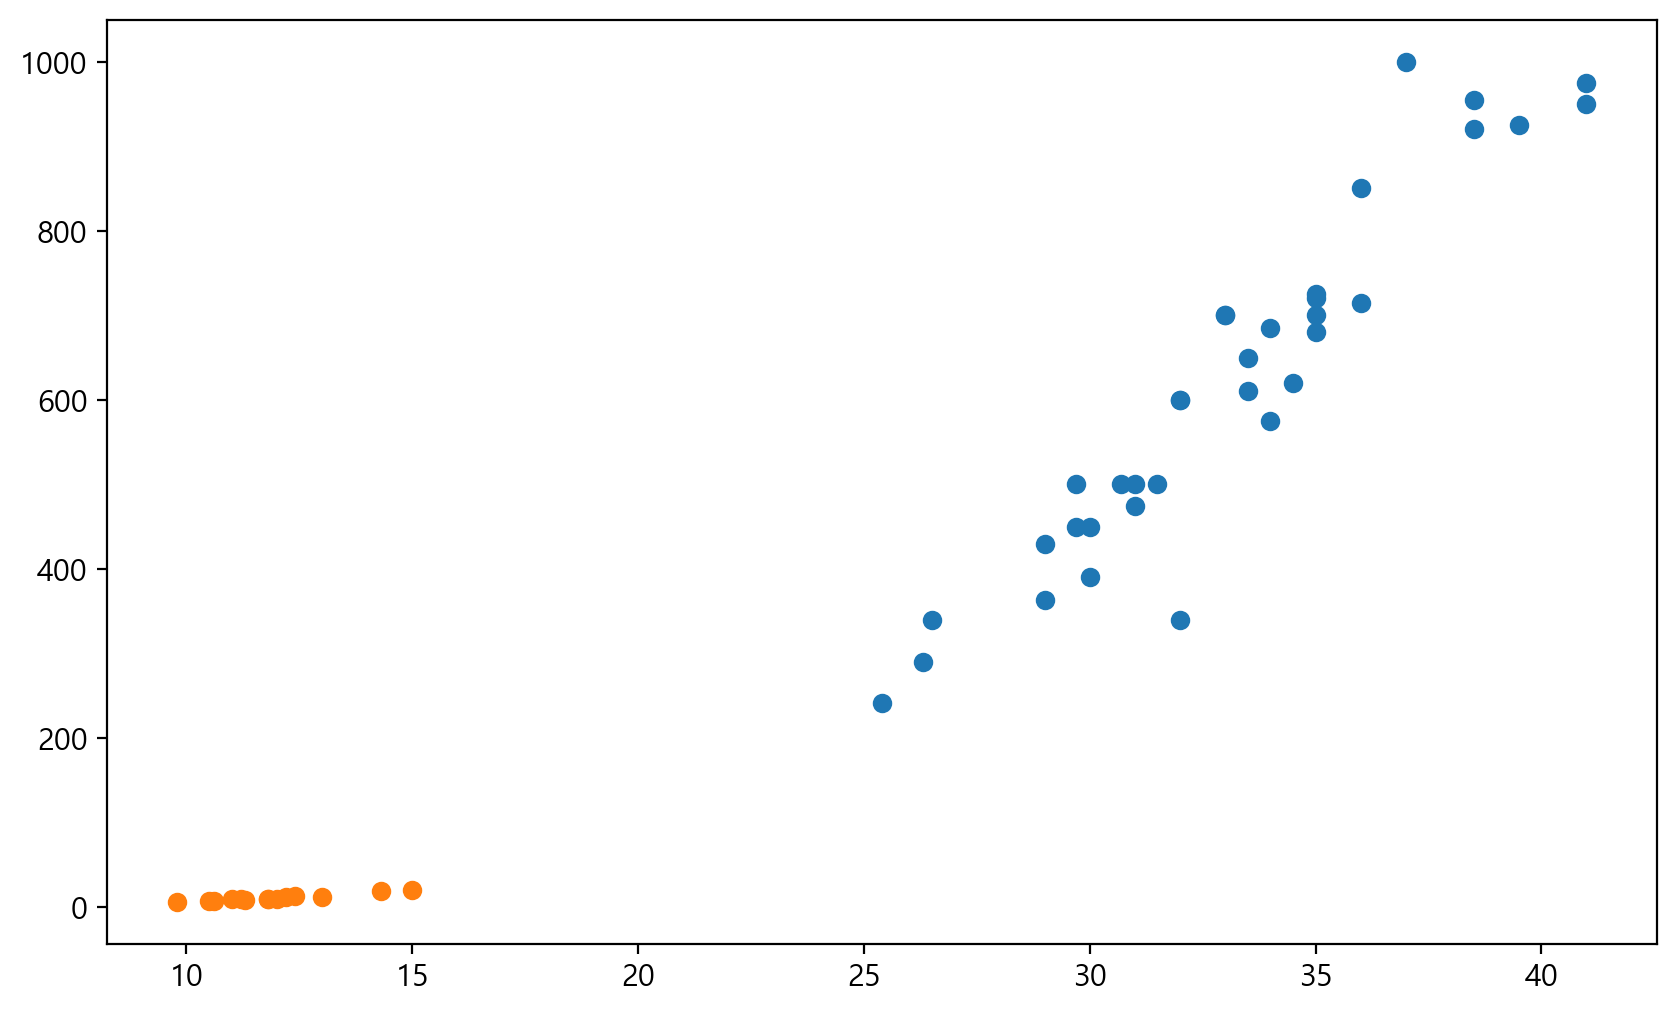

In [54]:
plt.scatter(bream_length, bream_weight);
plt.scatter(smelt_length, smelt_weight);

In [67]:
# 모델의 입력데이터 형식으로 변경 => 2차원
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# zip() 이용하여 2차원 리스트로 합치기
# fishData = [[l,w] for l, w in zip(length, weight)] # 2차원 리스트
fishData = list(zip(length, weight)) # 리스트튜플

# 생선(도미, 빙어)의 길이와 무게
# for i, j in fishData:
#     print(i, j)

fishData

[(25.4, 242.0),
 (26.3, 290.0),
 (26.5, 340.0),
 (29.0, 363.0),
 (29.0, 430.0),
 (29.7, 450.0),
 (29.7, 500.0),
 (30.0, 390.0),
 (30.0, 450.0),
 (30.7, 500.0),
 (31.0, 475.0),
 (31.0, 500.0),
 (31.5, 500.0),
 (32.0, 340.0),
 (32.0, 600.0),
 (32.0, 600.0),
 (33.0, 700.0),
 (33.0, 700.0),
 (33.5, 610.0),
 (33.5, 650.0),
 (34.0, 575.0),
 (34.0, 685.0),
 (34.5, 620.0),
 (35.0, 680.0),
 (35.0, 700.0),
 (35.0, 725.0),
 (35.0, 720.0),
 (36.0, 714.0),
 (36.0, 850.0),
 (37.0, 1000.0),
 (38.5, 920.0),
 (38.5, 955.0),
 (39.5, 925.0),
 (41.0, 975.0),
 (41.0, 950.0),
 (9.8, 6.7),
 (10.5, 7.5),
 (10.6, 7.0),
 (11.0, 9.7),
 (11.2, 9.8),
 (11.3, 8.7),
 (11.8, 10.0),
 (11.8, 9.9),
 (12.0, 9.8),
 (12.2, 12.2),
 (12.4, 13.4),
 (13.0, 12.2),
 (14.3, 19.7),
 (15.0, 19.9)]

In [71]:
# y 데이터: 1 도미(35개), 0 빙어(14개)
y = [1]*35 + [0]*14
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [75]:
# 2) 모델 생성
modelKn = KNeighborsClassifier()

# 3) 모델 학습; 훈련, Training
modelKn.fit(fishData, y)

KNeighborsClassifier()

In [86]:
# 4) 데이터 예측
print(accuracy_score(y, modelKn.predict(fishData)))
print(mean_squared_error(y, modelKn.predict(fishData)))
print(modelKn.predict([(12.0, 9.8)]))
print()


# 정확도 score(X_train, y_train)
print(modelKn.score(fishData, y))

# 미지의 데이터
# 확률보기 => .predict_proba()
print(modelKn.predict_proba([(38.5, 920.0)]))
print(modelKn.predict_proba([(11.8, 9.9)]))

1.0
0.0
[0]

1.0
[[0. 1.]]
[[1. 0.]]


## 학습 데이터와 테스트 데이터 분리
- train_test_split(전체데이터X, 전체데이터y,
                test_size=검증데이터크기(def=0.25),
                random_state=난수데이터생성번호)

In [91]:
# 모델의 입력데이터 형식으로 변경 => 2차원
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# zip() 이용하여 2차원 리스트로 합치기
fishData = list(zip(length, weight)) # 리스트튜플

# y 데이터: 1 도미(35개), 0 빙어(14개)
fishTarget = [1]*35 + [0]*14

In [96]:
X_train, X_test, y_train, y_test = train_test_split(np.array(fishData), fishTarget, test_size=0.2, random_state=1) # fishData=X, fishTarget=y, test_size=0.25(def)
len(fishData), len(X_train), len(X_test)

(49, 39, 10)

In [145]:
# 학습용
print(X_train[:3], '\n\n', y_train[:3])
print()
print(X_test[:3], '\n\n', y_test[:3])

[[ 38.5 955. ]
 [ 11.    9.7]
 [ 34.  685. ]] 

 [1, 0, 1]

[[ 36.  714. ]
 [ 41.  950. ]
 [ 11.2   9.8]] 

 [1, 1, 0]


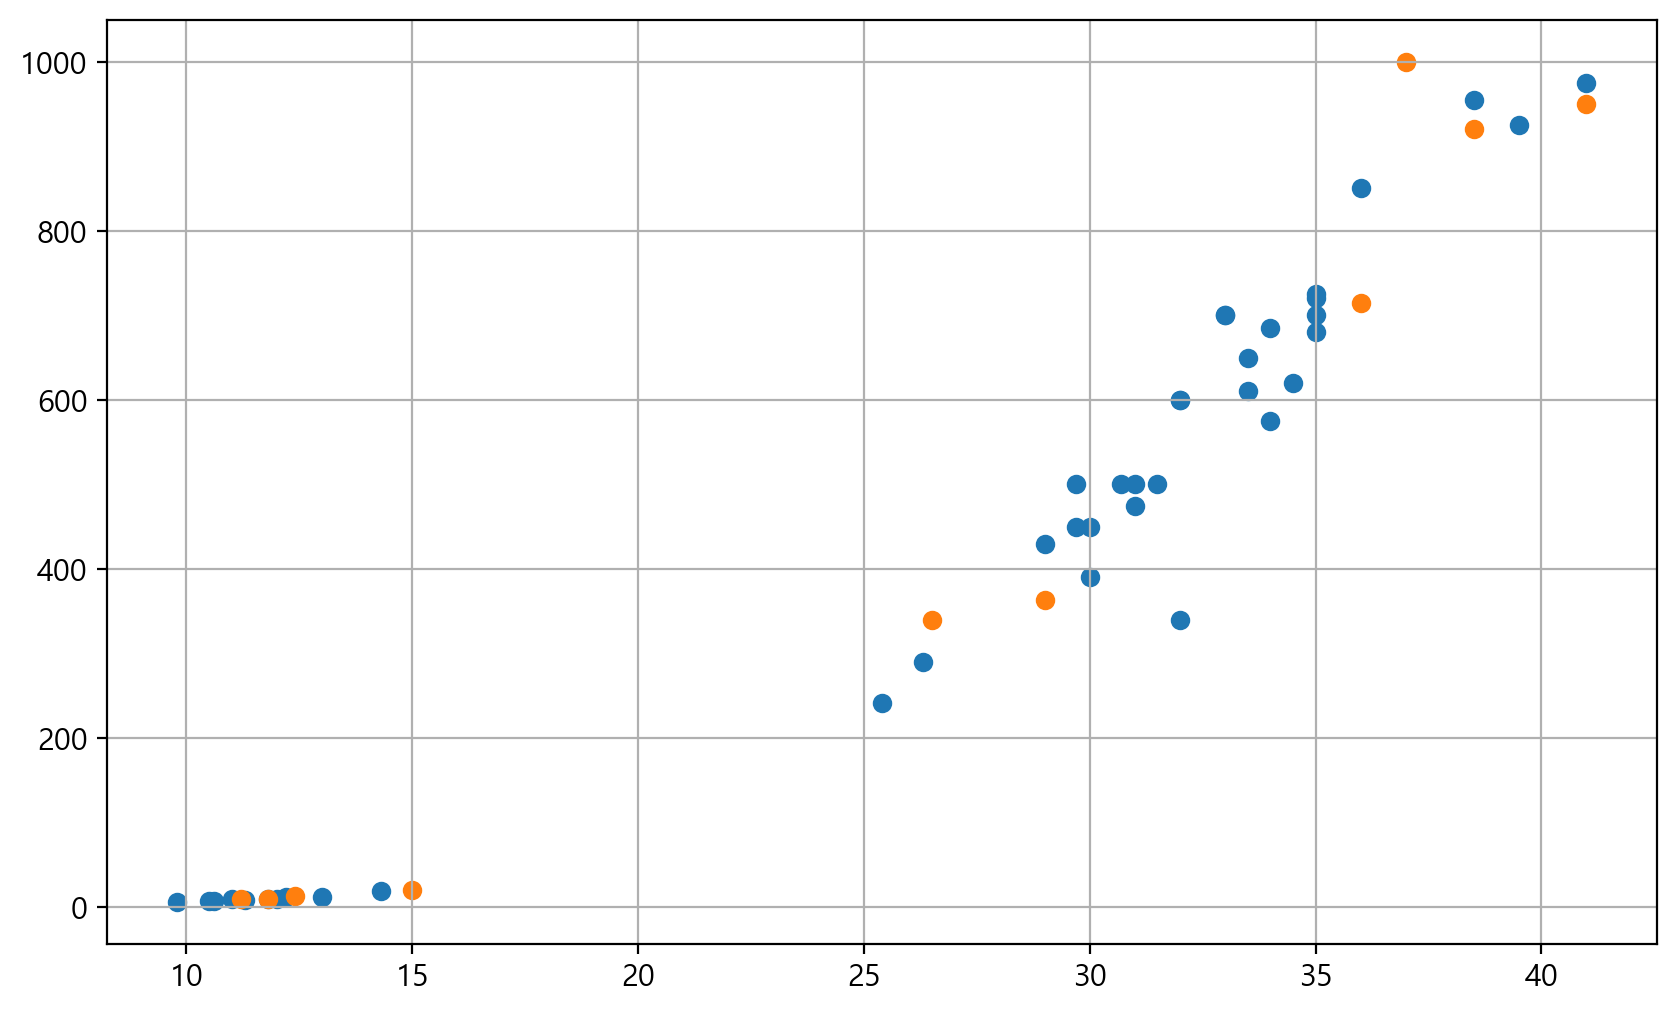

In [157]:
# 학습용과 테스트용 데이터가 잘 혼합되었는지 시각화

plt.scatter(X_train[:,0], X_train[:,1]);
plt.scatter(X_test[:,0], X_test[:,1]);
plt.grid()

In [159]:
# 모델 생성
modelKn = KNeighborsClassifier()

# 모델 학습
modelKn.fit(X_train, y_train)

KNeighborsClassifier()

In [169]:
# 데이터 예측
print(modelKn.predict(X_test))
print(X_test,'\n', y_test)
print(modelKn.predict_proba([[36,   714]]))

# 5) 평가
accuracy_score(y_test, modelKn.predict(X_test)), mean_squared_error(y_test, modelKn.predict(X_test))

[1 1 0 0 1 1 0 1 0 1]
[[  36.   714. ]
 [  41.   950. ]
 [  11.2    9.8]
 [  15.    19.9]
 [  26.5  340. ]
 [  29.   363. ]
 [  11.8    9.9]
 [  37.  1000. ]
 [  12.4   13.4]
 [  38.5  920. ]] 
 [1, 1, 0, 0, 1, 1, 0, 1, 0, 1]
[[0. 1.]]


(1.0, 0.0)

In [171]:
# 슬라이드 60~62 퀴즈
import seaborn as sns
penguins = sns.load_dataset('penguins')


# Sklearn의 데이타셋

In [188]:
iris = load_iris()
# iris

# label data
print(iris['target'])
print(iris['target_names'])

# dict의 key만 확인
print(iris.keys())

# 데이터 설명
# print(iris['DESCR'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [194]:
# 실제 데이터
print(iris['feature_names'])
print(iris['data'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [200]:
df = pd.DataFrame(iris['data'],
                 columns=iris['feature_names'])
df['label'] = iris['target']
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
29,4.7,3.2,1.6,0.2,0
37,4.9,3.6,1.4,0.1,0
127,6.1,3.0,4.9,1.8,2
133,6.3,2.8,5.1,1.5,2
98,5.1,2.5,3.0,1.1,1


Text(0.5, 1.0, 'petal')

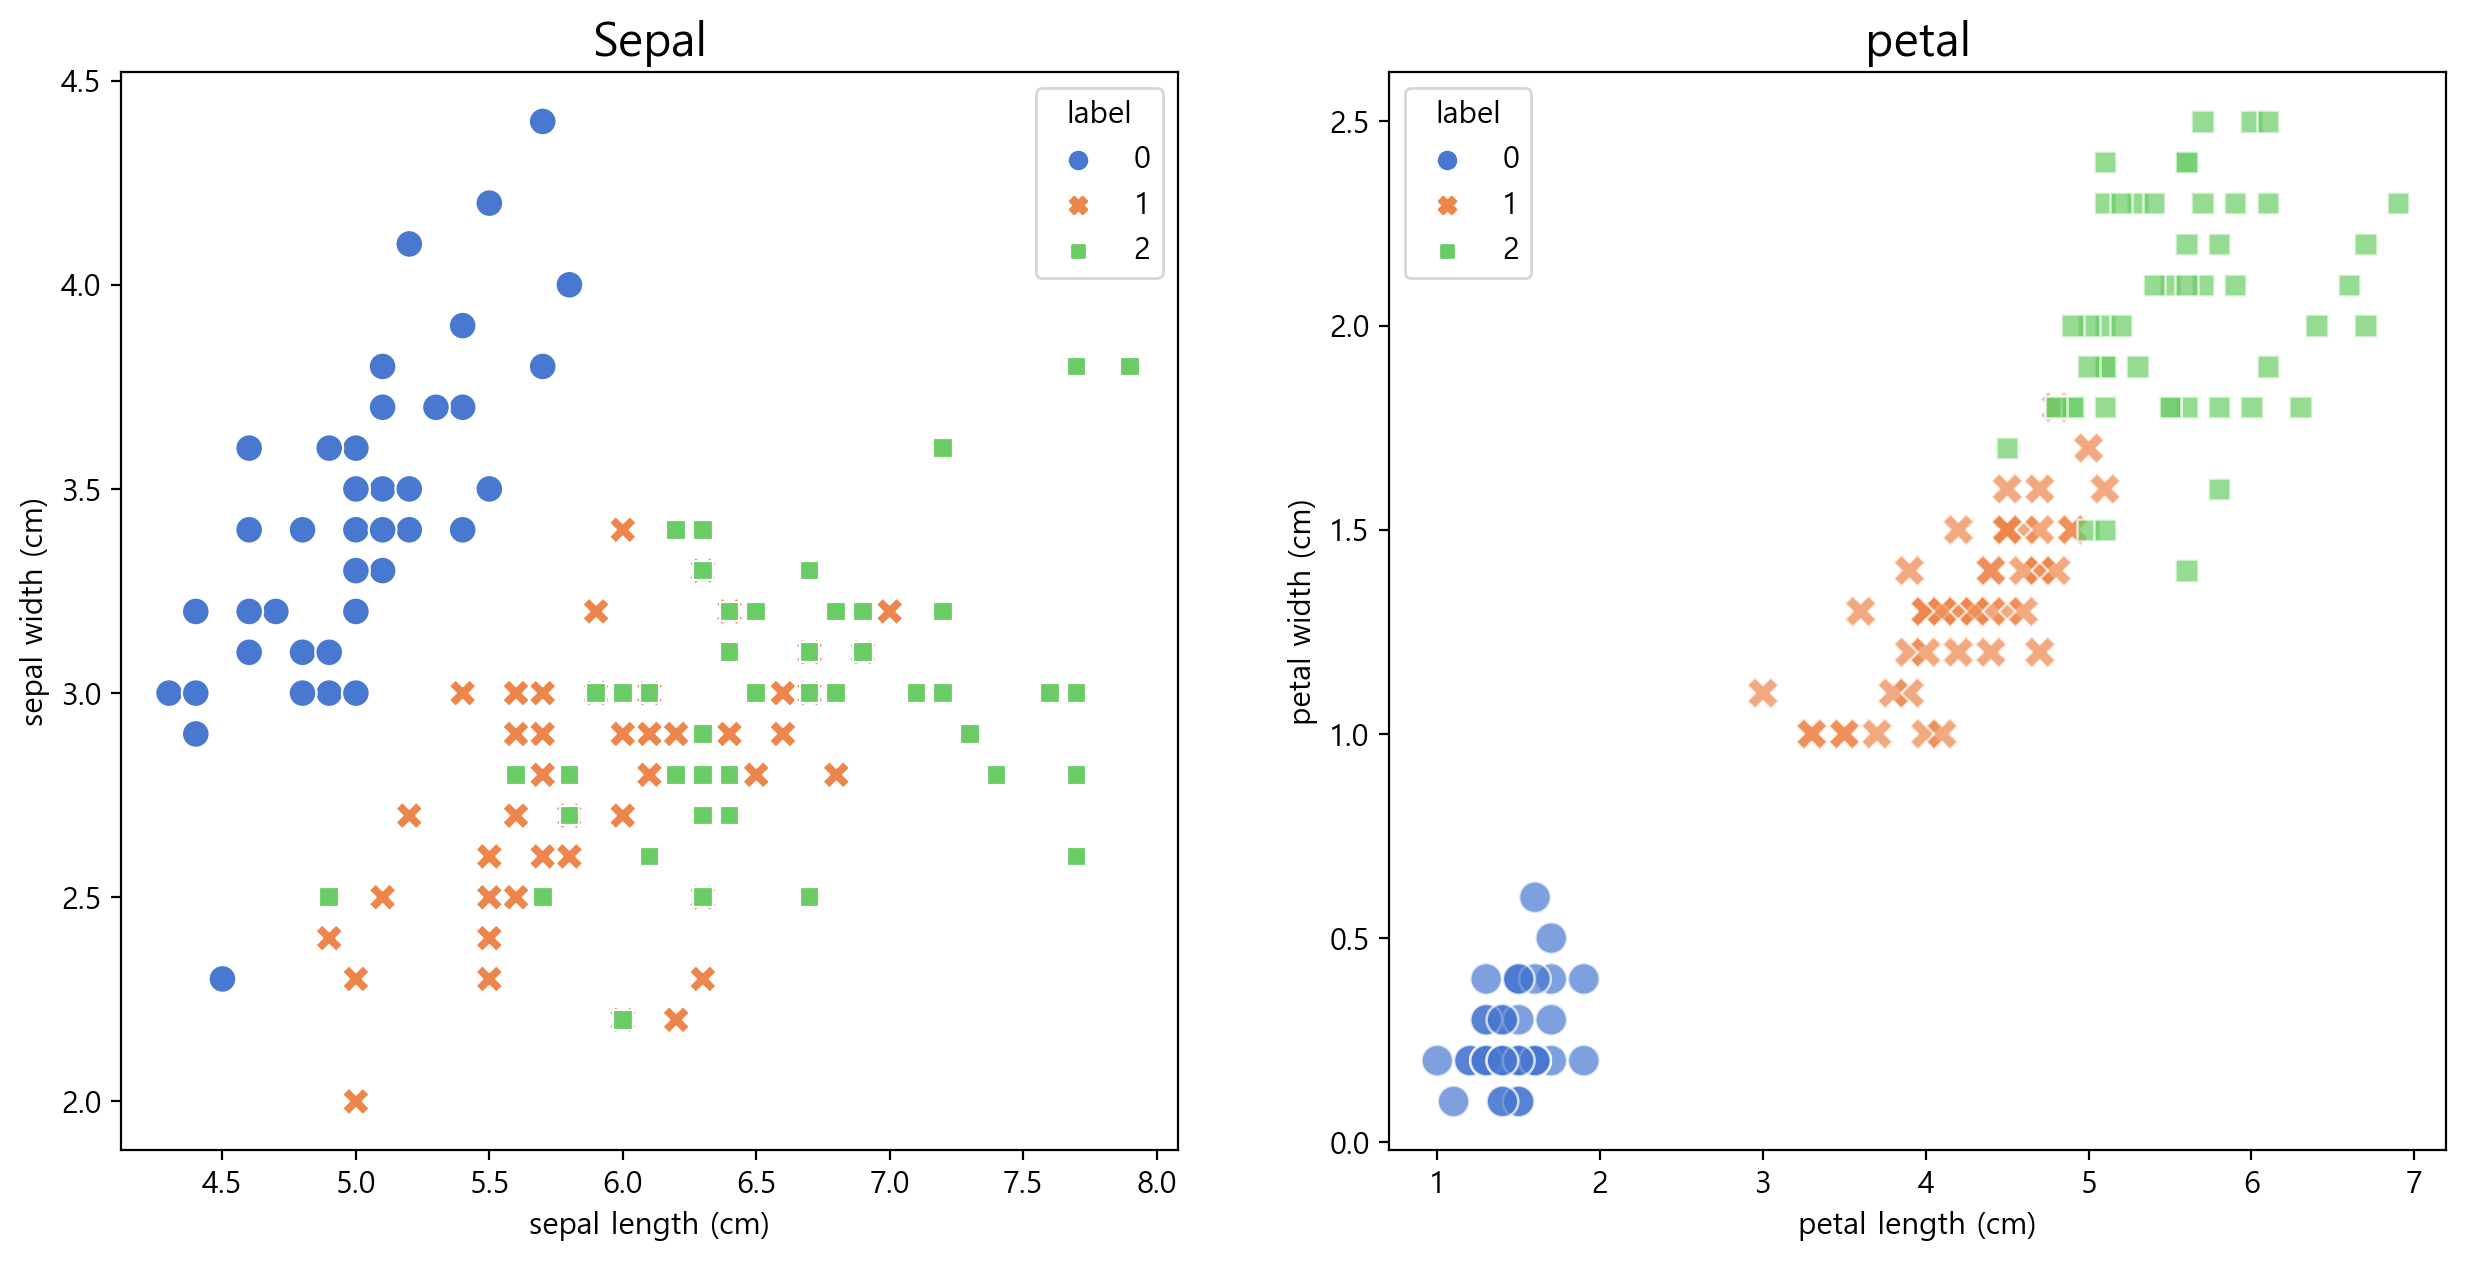

In [206]:
# 시각화
plt.figure(figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='label', style='label', s=100, data=df, palette='muted');
plt.title('Sepal', fontsize=17)

plt.subplot(122)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='label', style='label', s=130, data=df, palette='muted', alpha = 0.7);
plt.title('petal', fontsize=17)

In [210]:
# 학습용과 테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(np.array(iris['data']), iris['target'], test_size=0.2, random_state=1)
df.shape, len(X_train), len(X_test)

((150, 5), 120, 30)

In [214]:
modelRf = RandomForestClassifier()
modelRf.fit(X_train, y_train)

modelRf.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [215]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [218]:
print(accuracy_score(y_test, modelRf.predict(X_test)))
print(mean_squared_error(y_test, modelRf.predict(X_test)))

0.9666666666666667
0.03333333333333333


In [241]:
diabetes = load_diabetes()
# diabetes['data_filename']

df = pd.DataFrame(diabetes['data'],
                 columns=diabetes['feature_names'])
df['label'] = diabetes['target']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
# 시각화
plt.scatter